In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ivhd import IVHD

Download MNIST dataset

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.int32)

Plain IVHD

In [8]:
ivhd = IVHD(n_components=2, nn=5, rn=5, c=0.15, lambda_=0.85, simulation_steps=2500)
X_train_ivhd = ivhd.fit_transform(X)

In [4]:
def visualise(X_train_ivhd, y_train_ivhd):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_train_ivhd[:, 0], y=X_train_ivhd[:, 1], hue=y_train_ivhd, palette="tab10", legend="full", alpha=0.6)
    plt.title(f"IVHD of MNIST Dataset")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    
    plt.show()

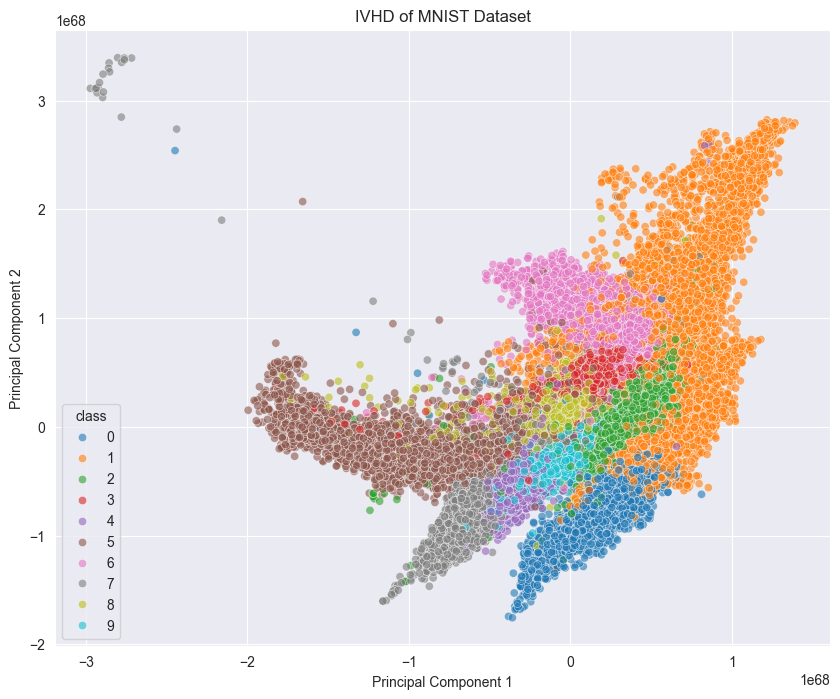

In [9]:
visualise(X_train_ivhd, y)

Gradient IVHD

In [12]:
from ivhd import IVHDGrad

ivhd_grad = IVHDGrad(steps=2500, nn=5, rn=5, optimizer='adam', optimizer_params={'lr': 0.01}, pos_weight=0.9, re_draw_remote_neighbors=True)
X_train_ivhd_grad = ivhd_grad.fit_transform(X)

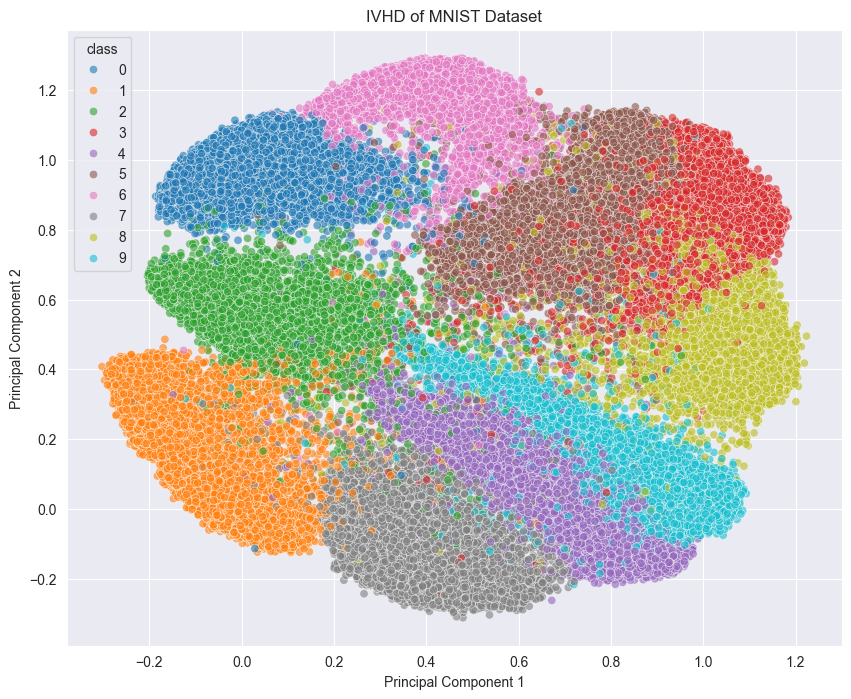

In [13]:
visualise(X_train_ivhd_grad, y)